## Описание проекта


### Задача
Сеть фитнесс-центров "Культурист-датасаентист" разрабатывает стратегия взаимодестввия с пользователями на основе аналитических данных. Распространённая проьоема фитнес-клубов и других сервисов - отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тез, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине - не похоже, что он "отвалился". А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плози: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал - скорее всего, он не вернется.
Чтобы бороться с оттоком, отдел по работе с клинтами "Культуриста-датасаентиста" перевёл в электронный вид множество анкет пользователей. Ваша задача - провести анализ и подготовить план действий по удержанию клиентов.

### Описание данных


>* **`'churn'` - *факт оттока в текущем месяце (целевая переменная)***
* **`'gender'`** - *пол*
* **`'near_location'`** - *проживание или работа в районе, где находится фитнес-центр*
* **`'partner'`** - *сотрудник компании-партёра клуба* 
* **`'promo_friends'`** - *факт первоначальной записи в рамках акции "приведи друга"*
* **`'phone'`** - *наличие контактного телефона*
* **`'age'`** - *возраст*
* **`'lifetime'`** - *время с первого обращения в фитнесс-центр*
* **`'contract_period'`** - *длительность текущего действующего аобнемента (месяц, 3 месяца, 6 месяцев, 1 год)*
* **`'month_to_end_contract'`** - *срок до окончания текущего действующего абонемента (в месяцах)*
* **`'group_visits'`** - *факт посещения групповых занятий*
* **`'avg_class_frequency_total'`** - *средняя частота посещений в неделю за все время с начала действия абонемента*
* **`'avg_class_frequency_current_month'`** - *средняя частота посещений в неделю за предыдущий месяц* 
* **`'avg_additional_charges_total'`** - *суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон*



#### Загрузка библиотек

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#визуализация
import seaborn as sns; sns.set()


#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#доп настройки
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')  

##### Загрузка датасета

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


##### Проверка датасета на наличие дублей, пропусков и ошибок

In [3]:
#приведём названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [4]:
print('Кол-во дублей в строках: {}\n'.format(data.duplicated().sum()))
print(data.info())

Кол-во дублей в строках: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


In [5]:
data.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


> **Вывод:**
* Дублей строк в данных не обнаружено, пропусков тоже. Идём дальше.


#### EDA

###### Посмотрим отсутствующие признаки, изучим средние значения и стандартные отклонения

In [6]:
print(data.describe().T)

                                    count        mean        std        min        25%         50%         75%         max
gender                             4000.0    0.510250   0.499957   0.000000   0.000000    1.000000    1.000000    1.000000
near_location                      4000.0    0.845250   0.361711   0.000000   1.000000    1.000000    1.000000    1.000000
partner                            4000.0    0.486750   0.499887   0.000000   0.000000    0.000000    1.000000    1.000000
promo_friends                      4000.0    0.308500   0.461932   0.000000   0.000000    0.000000    1.000000    1.000000
phone                              4000.0    0.903500   0.295313   0.000000   1.000000    1.000000    1.000000    1.000000
contract_period                    4000.0    4.681250   4.549706   1.000000   1.000000    1.000000    6.000000   12.000000
group_visits                       4000.0    0.412250   0.492301   0.000000   0.000000    0.000000    1.000000    1.000000
age             

> **Вывод:**
* Распределение по полу примерно одинаково
* Большинство клиентов (85%) живет или работает рядом с фитнес-клубом
* Примерно половина клиентов являются сотрудниками партнерских организаций
* Около 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера примерно 90% клиентов
* Средняя длительность абонементов клиентов - 4.6 месяцев
* Около 40% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Средние дополнительные расходы на клиента - 146
* Средний срок до окончания договора - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.87 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* **Доля оттока - 27%**

##### Посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался (groupby)

In [7]:
print('Отток:')
print(data[data['churn']==1].describe().T)
print('\nОставшиеся клиенты:')
print(data[data['churn']==0].describe().T)

Отток:
                                    count        mean        std        min        25%         50%         75%         max
gender                             1061.0    0.510839   0.500118   0.000000   0.000000    1.000000    1.000000    1.000000
near_location                      1061.0    0.768143   0.422217   0.000000   1.000000    1.000000    1.000000    1.000000
partner                            1061.0    0.355325   0.478837   0.000000   0.000000    0.000000    1.000000    1.000000
promo_friends                      1061.0    0.183789   0.387495   0.000000   0.000000    0.000000    0.000000    1.000000
phone                              1061.0    0.902922   0.296204   0.000000   1.000000    1.000000    1.000000    1.000000
contract_period                    1061.0    1.728558   2.132371   1.000000   1.000000    1.000000    1.000000   12.000000
group_visits                       1061.0    0.268615   0.443448   0.000000   0.000000    0.000000    1.000000    1.000000
age      

> **Вывод на основе отличий признаков у клиентов, попавших в отток и оставшихся:**
* Распределение по полу не отличается
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке


### Построим столбчатые гистограммы и распределения признаков для тех, кто ушел и тех, кто остался.

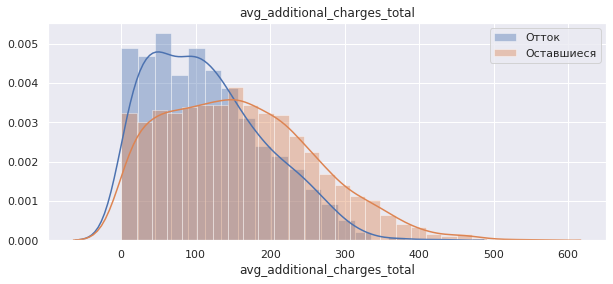

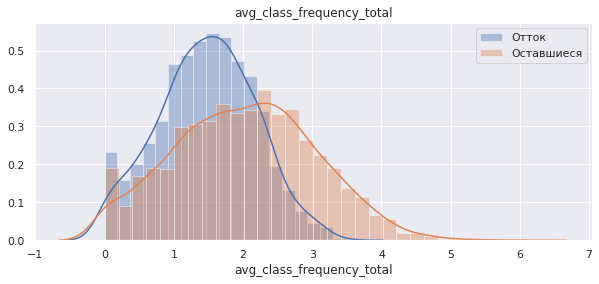

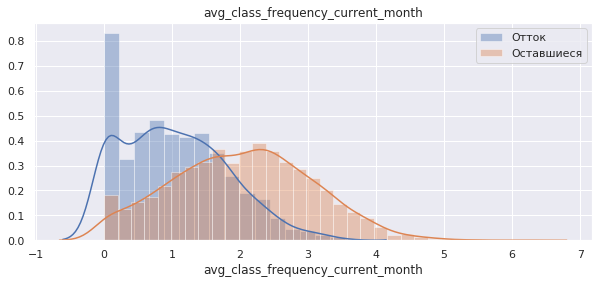

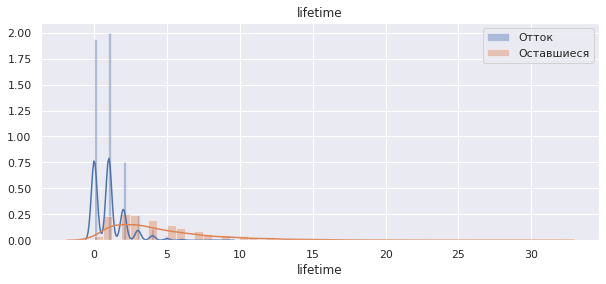

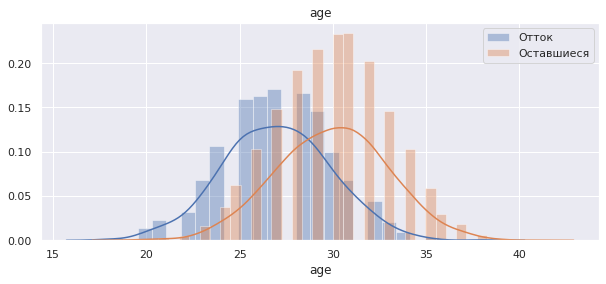

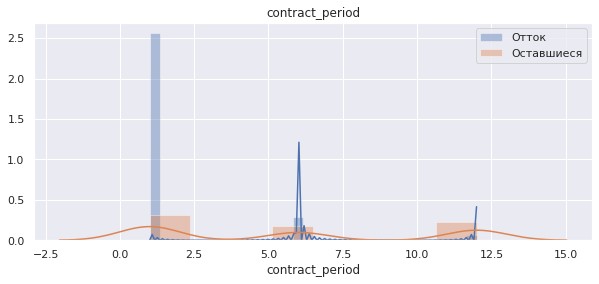

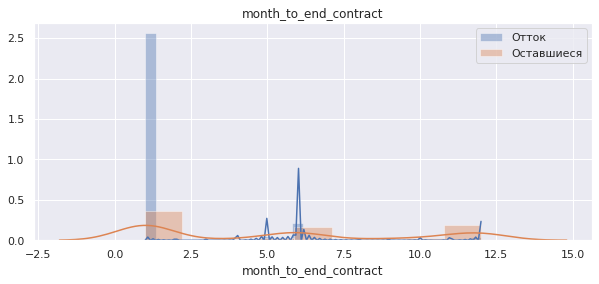

In [8]:
left = data[data['churn']==1]
stayed = data[data['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stayed[column])
  plt.legend(['Отток', 'Оставшиеся'])
  plt.show()

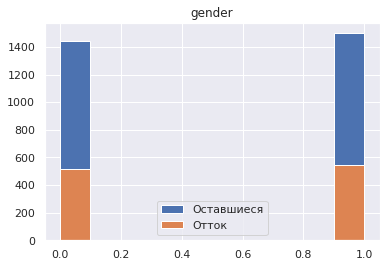

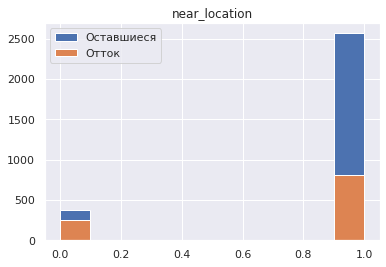

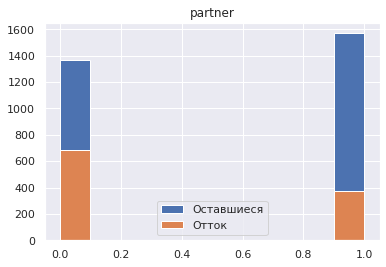

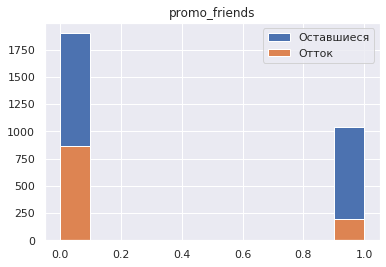

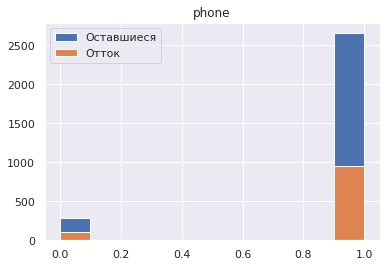

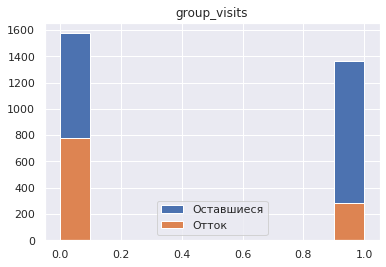

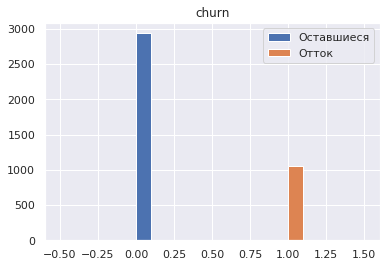

In [9]:
for column in data.columns:
  if column not in distplot_columns:
    data.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()


### Построим матрицу корреляций

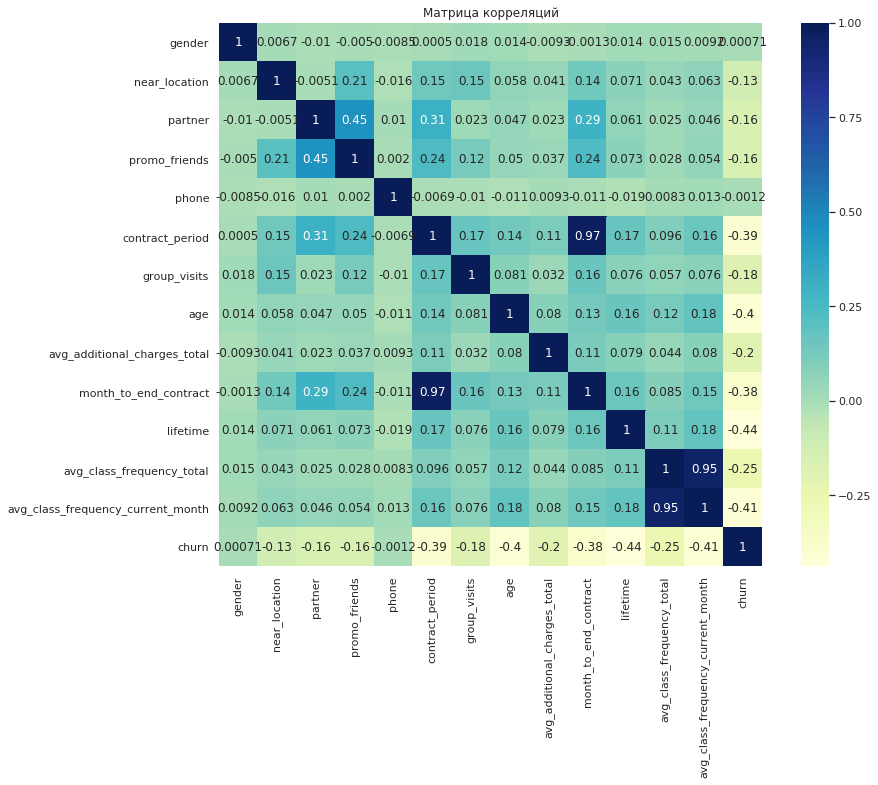

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(data = data.corr(), annot=True, square=True, cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

> **Вывод:**
* Явной зависимости факта оттока от признаков не обнаружено
* Имеются два мультиколлинеарных признака - contract_period и month_to_end_contact

## Построение модели прогнозирования оттока пользователей
---

### Построим модель бинарной классификации пользователей, где целевой признак - факт оттока пользователя в следующем месяце.
  * Разобъем данные на обучающую и валидационную выборки функцией train_test_split()
  * Обучим модель на train-выборке логистической регрессией и случайным лесом
  * Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Какая модель показала себя лучше на основании метрик?


In [11]:
X = data.drop(['churn'], axis = 1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)

Метрики для модели логистической регрессии:
accuracy_score: 0.9225
precision_score: 0.8541666666666666
recall_score:0.8282828282828283

Метрики для модели случайного леса:
accuracy_score: 0.915
precision_score: 0.8385416666666666
recall_score:0.8131313131313131

Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
12  avg_class_frequency_current_month  4.426492
10                           lifetime  3.720057
11          avg_class_frequency_total  3.290506
7                                 age  1.074359
5                     contract_period  0.703741
8        avg_additional_charges_total  0.541020
9               month_to_end_contract  0.520089
6                        group_visits  0.385778
3                       promo_friends  0.268180
2                             partner  0.082845
1                       near_location  0.075301
0                              gender  0.013051
4                               phone  0.00

> **Вывод:**
* Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии
* Таким образом, модель логистической регрессии показала себя лучше.

### Кластеризация пользователей


##### Проведем кластеризацию пользователей без столбца целевого значения
  * Стандартизируем данные 
  * Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму. Предположим, какое количество кластеров можем выделить.
  * Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов. (берём n=5 кластеров)

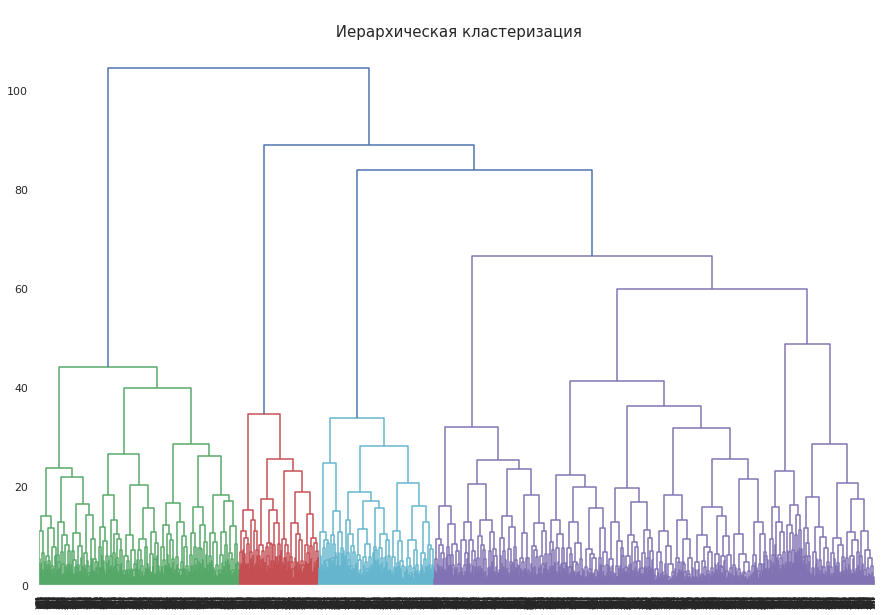

In [12]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
data['cluster_km'] = labels

> **Вывод:**
* Явно выделены 4 кластера
* Будем слкедовать условию задания и возьмём число кластеров равное 5.

### Посмотрим на средние значения признаков для кластеров. Можем ли мы что-то заметить по ним?
Для каждого полученного кластера посчитаем долю оттока (groupby). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие - надёжны?

In [13]:
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


###  **Описание кластеров:**
* **Кластер 0**
  * **Отток - 3% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Заключают договора **на длительный срок**
  * Преобладают сотрудники компаний-партнеров - 78%
  * Чаще всех посещают групповые занятия - 54%
* **Кластер 1**
  * Отток - 27%
  * Живут или работают недалеко от фитнес-центра
  * Нет номера телефона
  * Средняяя продолжительность контракта - около 5 месяцев
* **Кластер 2**
  * Отток - 44%
  * **Живут или работают в другом районе**
  * Самый низкий процент пришедших по промо-акции
  * Реже всех посещают групповые занятия
* **Кластер 3**
  * **Отток - 51% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
* **Кластер 4**
  * Отток - 7%
  * Живут или работают недалеко от фитнес-центра
  * Чаще всех посещают клуб - 2.81 раз в неделю
  * Контракты на недлительный срок - 2-3 месяца

### Построим распределения признаков для кластеров. 

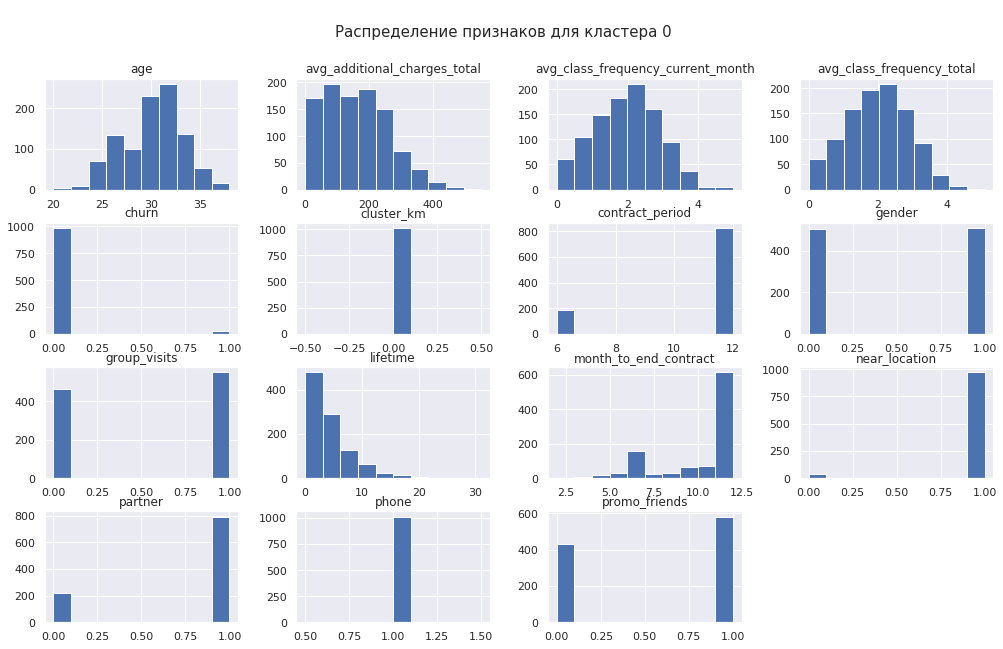

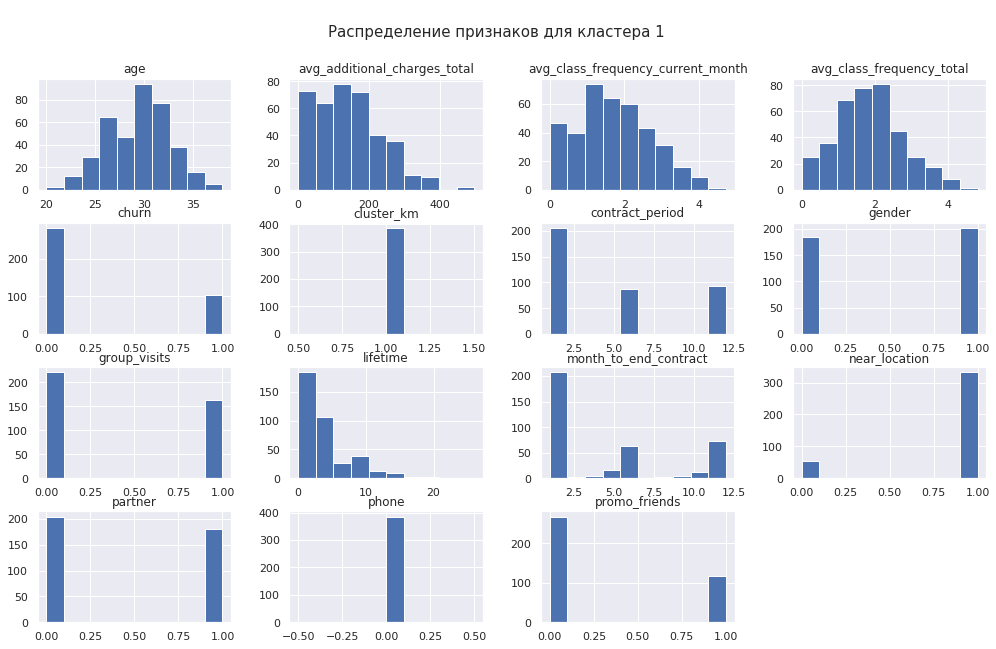

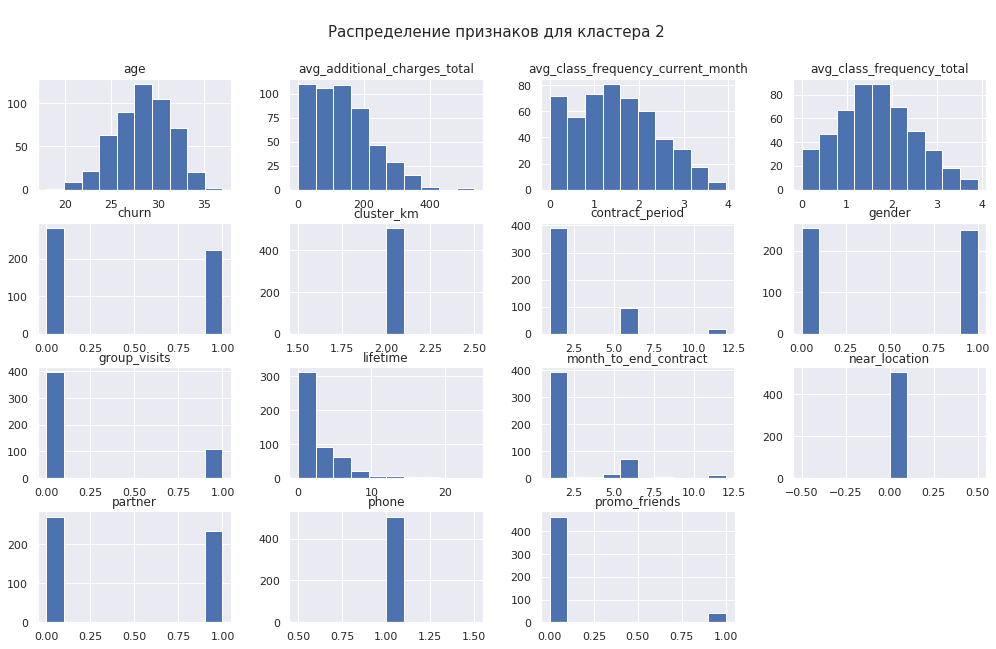

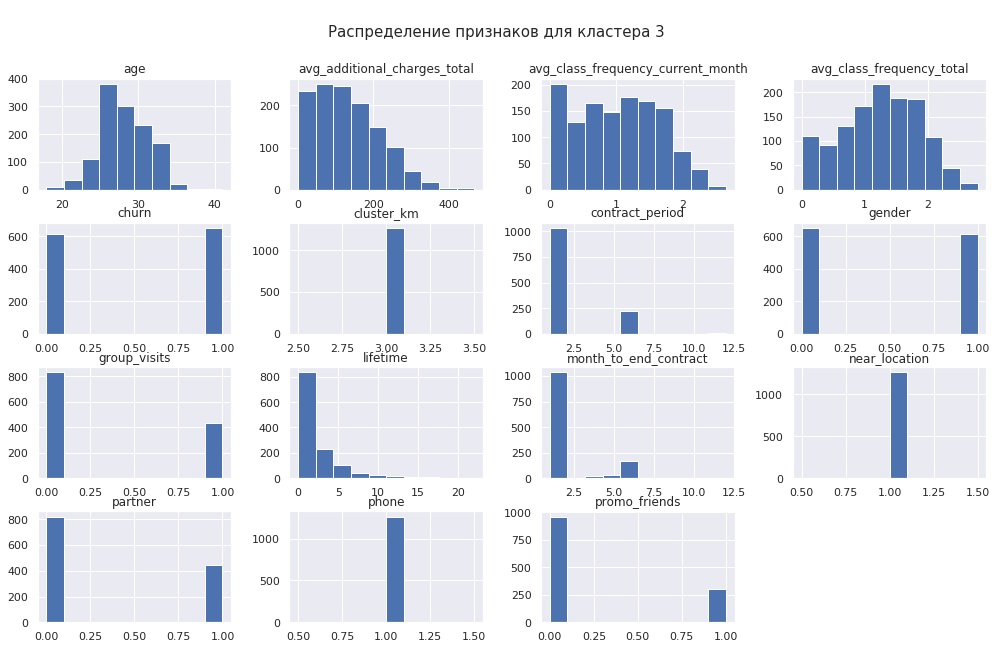

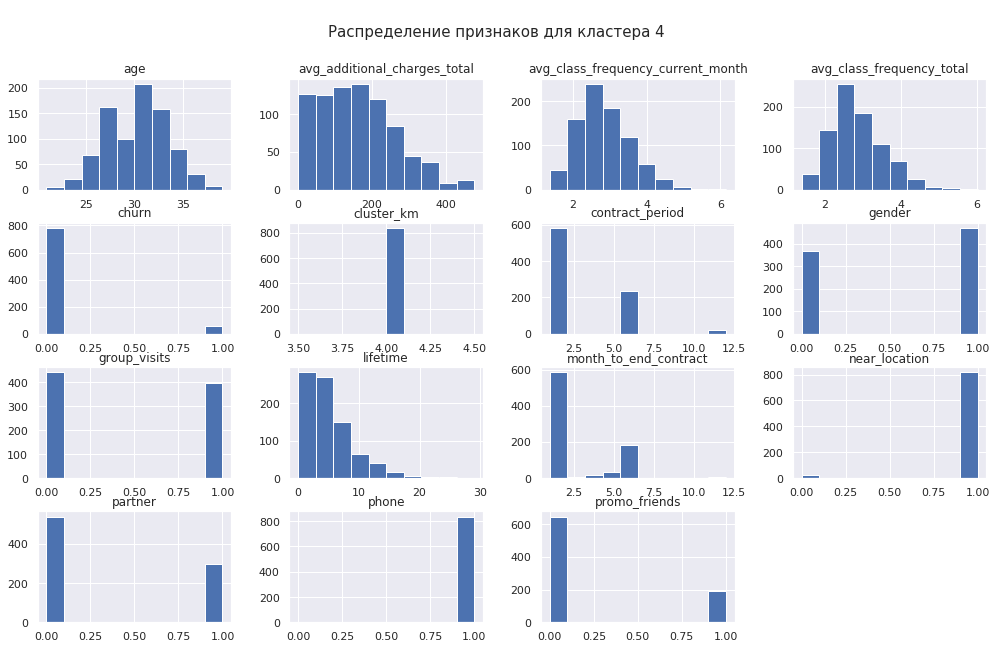

In [14]:
for value in [0, 1, 2, 3, 4]:
  data[data['cluster_km']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

## Выводы и рекомендации по работе с клиентами

**Выводы по имеющимся данным:**
* Распределение по полу примерно одинаково
* Большинство клиентов живет или работает рядом с фитнес-клубом
* Примерно половина клиентов являются сотрудниками партнерских организаций
* Около 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера примерно 90% клиентов
* Средняя длительность абонементов клиентов - 4.6 месяцев
* Около 40% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Средняя частота посещений за все время - 1.87 раз в неделю
* **Доля оттока - 27%**

**Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:**
* Распределение по полу не отличается
* Ближе живущие или работающие клиенты реже попадают в отток
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб, чем остальные
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

**Мы разбили всех наших клиентов на 5 групп.**

**Признаки "хороших групп":**
 * Возраст — он, хоть и незначительно, но больше
 * Длительность абонемента
 * Время с момента первого обращения — ходят давно
 * БОльшие расходы на доп. услуги
 * Высокая средняя частота посещений в неделю за предыдущий месяц

**Рекомендации**:

1.  Выгоднее продавать больше долгосрочных абонементов - на них отток ниже. 
2.  Заключать корпоративные контракты компаниями -- такие клиенты реже уходят. 
3.  Клиенты, занимающиеся групповыми занятиями тоже уходят редко. Значит нужно аинтересовывать их этой услугой. Проводить опросы и выявлять интересные клиентам направления.
4.  Ориентироваться на клиентов 30+. Они посещают стабильнее.
